# Part 2
## question (a)
**Here we use `np.linalg` to solve the linear equations.**

In the following code, we conduct replicating for three times. In each time, we need to solve the linear equations $AX = b$, where$$X = (x, h), AX = \overline{V}_{t+1}, b = \overline{P}_{t+1}$$, $AX$ is the value of replicating portfolio at time $t+1$ discounting to time $t$, $b$ is the value of put option at time $t+1$ discounting to time $t$.\
Then in $(x,h)$, x is the value of replicating portfolio, h is the hedging position.

In [1]:
import numpy as np
from fractions import Fraction

def rep_pricing(s,u,d,k,r,f):
    # t=1, w=U
    a = np.array([[1,s*u*u/(1+r)-s*u+f],[1,s*u*d/(1+r)-s*u+f]])
    b = np.array([max(0,k-s*u*u)/(1+r),max(0,k-s*u*d)/(1+r)])
    x_u,h_u = np.linalg.solve(a,b)
    assert(h_u<0)
    
    # t=1, w=D
    a = np.array([[1,s*u*d/(1+r)-s*d+f],[1,s*d*d/(1+r)-s*d+f]])
    b = np.array([max(0,k-s*u*d)/(1+r),max(0,k-s*d*d)/(1+r)])
    x_d,h_d = np.linalg.solve(a,b)
    assert(h_d<0)
    
    # t=0
    a = np.array([[1,s*u/(1+r)-s+f],[1,s*d/(1+r)-s+f]])
    b = np.array([x_u/(1+r),x_d/(1+r)])
    x,h = np.linalg.solve(a,b)
    assert(h<0)
    
    return x

Then, the answer of question (a) is `rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0)`. To note that, beacuse it is a perfect market without any short selling fee, we need to set f=0

In [2]:
rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0)

4.074074074074075

to show it in fraction form

In [3]:
x = rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0)
Fraction(x).limit_denominator()

Fraction(110, 27)

Hence, the answer of question(a) is$$P_0=\frac{110}{27}$$

## qeustion (b)
use the function we defined before, the answer of qeustion be should be `rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0.2)`. The difference between the model in question (a) and (b) is the **short selling fee**. Here we set f=0.2

In [4]:
x = rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0.2)
Fraction(x).limit_denominator()

Fraction(28859, 6750)

In [5]:
x

4.275407407407408

Hence, the answer of question (b) is $$P_0 = \frac{28859}{6750} = 4.2754$$

## question (c)
In this part, let's plot an graph of put option price $P_0$ and short selling fee rate $f$.

[Text(0.5, 1.0, 'relationship between option price and short selling fee'),
 Text(0, 0.5, 'put option price'),
 Text(0.5, 0, 'short selling fee rate')]

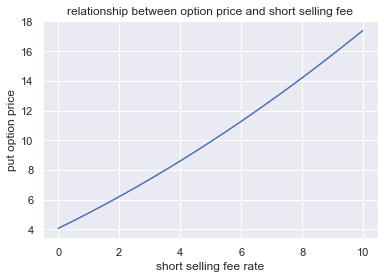

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fees = np.arange(0,10,0.02)
prices = [rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=f) for f in fees]
plt.plot(fees, prices)
plt.gca().set(title="relationship between option price and short selling fee",
              ylabel='put option price', xlabel='short selling fee rate')